In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import os
try:
	os.chdir('C:\\Users\\Administrator\\Desktop\\ml_ipynb\\ex7')
	print(os.getcwd())
except:
    print(os.getcwd()+" not changed!!!")



C:\Users\Administrator\Desktop\ml_ipynb\ex7


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
import numpy as np
import pandas as pd

import sys
sys.path.append('..')

from helper import kmeans as km


 # 使用k-means进行数据压缩

 ## 1 首先加载数据看看

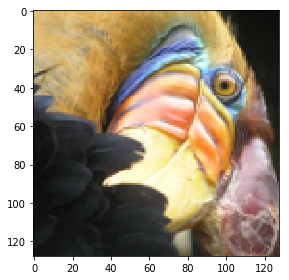

In [3]:
# http://scikit-image.org/
# cast to float, you need to do this 
# otherwise the color would be weird after clustring
pic = io.imread('data/bird_small.png')/255.
io.imshow(pic)
data = pic.reshape(128*128, 3)


 ## 2 使用k-means进行数据压缩

In [4]:
# 使用自己写的果然特别慢啊啊.......4-5分钟
#C, centroids, cost = km.k_means(pd.DataFrame(data), 16, epoch = 10, n_init=3)
# 20秒左右,很快
from sklearn.cluster import KMeans
model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)
model.fit(data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=100, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
centroids = model.cluster_centers_
print(centroids.shape)
C = model.predict(data)
print(C.shape)
# 这个就是近似数据
print(centroids[C].shape)



(16, 3)
(16384,)
(16384, 3)


 ## 3 开始恢复图像对比

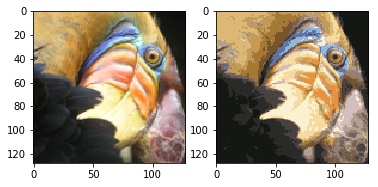

In [6]:
compressed_pic = centroids[C].reshape((128,128,3))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)

